<H1>OM CHOKSI 23AIML010 PMRP ASSIGNMENT 6 WITH CONCLUSION<H1>

<h1>CLASSWORK<h1>

QUESTIONS:-
->General Population and Gender Distribution


What is the total population in each county, and how does it vary by state?
What is the gender distribution (Men vs. Women) across different counties?
What is the average population size for census tracts in each state?
How does the population of each race (White, Black, Hispanic, etc.) differ across states?
What is the proportion of the male population compared to the female population in each census tract?


->Ethnicity and Race


What is the distribution of Hispanic population across various counties and states?
How do different racial groups (White, Black, Native, etc.) vary in terms of percentage of total population in different counties?
Which states have the highest percentage of Black or Hispanic populations?


->Employment and Work Type


What is the employment rate (Employed vs. Unemployed) for each census tract?
How does the rate of self-employed individuals compare to those working in private/public sectors across different states?
What percentage of the population works from home, and how does it vary by county and state?
How does the unemployment rate vary across different states and counties?
What is the distribution of employed individuals working in private vs. public sectors?


->Commuting and Transportation


What is the average commuting time across counties and states, and how does it differ for employed individuals?
What modes of transportation are most commonly used for commuting in different states (e.g., car, public transportation, walking)?
How does the percentage of people commuting via walking or public transportation vary between urban and rural areas?


->Income and Housing


What is the average income (or median household income) in each state and county?
How does the distribution of housing type (e.g., owner-occupied vs. renter-occupied) vary across different counties?
How does the cost of living compare across different states based on average income and housing costs?


-> Social Characteristics


What is the relationship between education levels (e.g., percentage with a high school diploma, bachelor’s degree) and employment types across different states?

# General Population and Gender Distribution #


What is the total population in each county, and how does it vary by state?

What is the gender distribution (Men vs. Women) across different counties?

What is the average population size for census tracts in each state?

How does the population of each race (White, Black, Hispanic, etc.) differ across states?

What is the proportion of the male population compared to the female population in each census tract?

In [65]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

df=pd.read_csv('acs2017_census_tract_data.csv')
df,df.head(),df.tail(),df.describe(),df.info(),df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74001 entries, 0 to 74000
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TractId           74001 non-null  int64  
 1   State             74001 non-null  object 
 2   County            74001 non-null  object 
 3   TotalPop          74001 non-null  int64  
 4   Men               74001 non-null  int64  
 5   Women             74001 non-null  int64  
 6   Hispanic          73305 non-null  float64
 7   White             73305 non-null  float64
 8   Black             73305 non-null  float64
 9   Native            73305 non-null  float64
 10  Asian             73305 non-null  float64
 11  Pacific           73305 non-null  float64
 12  VotingAgeCitizen  74001 non-null  int64  
 13  Income            72885 non-null  float64
 14  IncomeErr         72885 non-null  float64
 15  IncomePerCap      73256 non-null  float64
 16  IncomePerCapErr   73256 non-null  float6

(           TractId        State           County  TotalPop   Men  Women  \
 0       1001020100      Alabama   Autauga County      1845   899    946   
 1       1001020200      Alabama   Autauga County      2172  1167   1005   
 2       1001020300      Alabama   Autauga County      3385  1533   1852   
 3       1001020400      Alabama   Autauga County      4267  2001   2266   
 4       1001020500      Alabama   Autauga County      9965  5054   4911   
 ...            ...          ...              ...       ...   ...    ...   
 73996  72153750501  Puerto Rico  Yauco Municipio      6011  3035   2976   
 73997  72153750502  Puerto Rico  Yauco Municipio      2342   959   1383   
 73998  72153750503  Puerto Rico  Yauco Municipio      2218  1001   1217   
 73999  72153750601  Puerto Rico  Yauco Municipio      4380  1964   2416   
 74000  72153750602  Puerto Rico  Yauco Municipio      3001  1343   1658   
 
        Hispanic  White  Black  Native  ...  Walk  OtherTransp  WorkAtHome  \
 0      

In [66]:
#What is the total population in each county, and how does it vary by state?
total_population_by_county = df.groupby(['State', 'County'])['TotalPop'].sum().reset_index()
print(total_population_by_county)

total_population_by_state = df.groupby('State')['TotalPop'].sum().reset_index()
print(total_population_by_state)




        State             County  TotalPop
0     Alabama     Autauga County     55036
1     Alabama     Baldwin County    203360
2     Alabama     Barbour County     26201
3     Alabama        Bibb County     22580
4     Alabama      Blount County     57667
...       ...                ...       ...
3215  Wyoming  Sweetwater County     44527
3216  Wyoming       Teton County     22923
3217  Wyoming       Uinta County     20758
3218  Wyoming    Washakie County      8253
3219  Wyoming      Weston County      7117

[3220 rows x 3 columns]
                   State  TotalPop
0                Alabama   4850771
1                 Alaska    738565
2                Arizona   6809946
3               Arkansas   2977944
4             California  38982847
5               Colorado   5436519
6            Connecticut   3594478
7               Delaware    943732
8   District of Columbia    672391
9                Florida  20278447
10               Georgia  10201635
11                Hawaii   1421658
12  

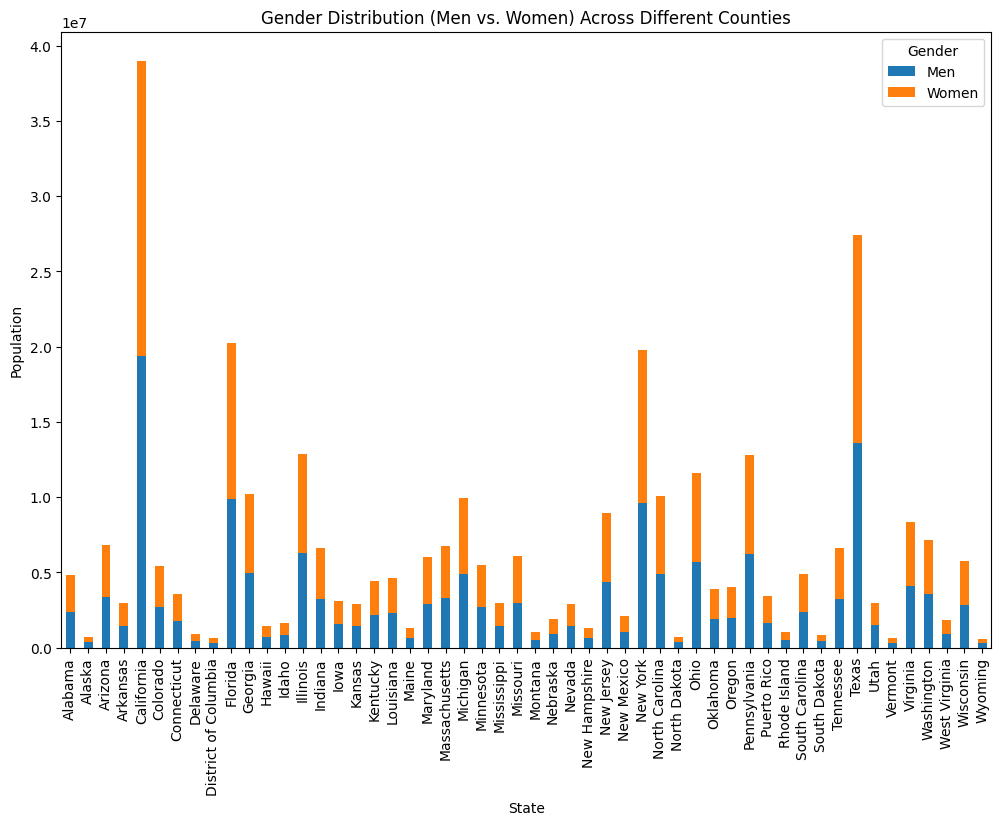

In [67]:
#What is the gender distribution (Men vs. Women) across different counties?

gender_distribution_by_county = df.groupby(['State', 'County'])[['Men', 'Women']].sum().reset_index()


fig, ax = plt.subplots(figsize=(12, 8))
gender_distribution_by_county.groupby('State')[['Men', 'Women']].sum().plot(kind='bar', stacked=True, ax=ax)
ax.set_title('Gender Distribution (Men vs. Women) Across Different Counties')
ax.set_xlabel('State')
ax.set_ylabel('Population')
plt.legend(title='Gender')
plt.show()


In [68]:
#What is the average population size for census tracts in each state?

average_population_by_state = df.groupby('State')['TotalPop'].mean().reset_index()
# print(average_population_by_state)
average_population_by_state.head()

,State,TotalPop
0,Alabama,4107.342083
1,Alaska,4422.544910
2,Arizona,4462.612058
3,Arkansas,4341.026239
4,California,4838.382400


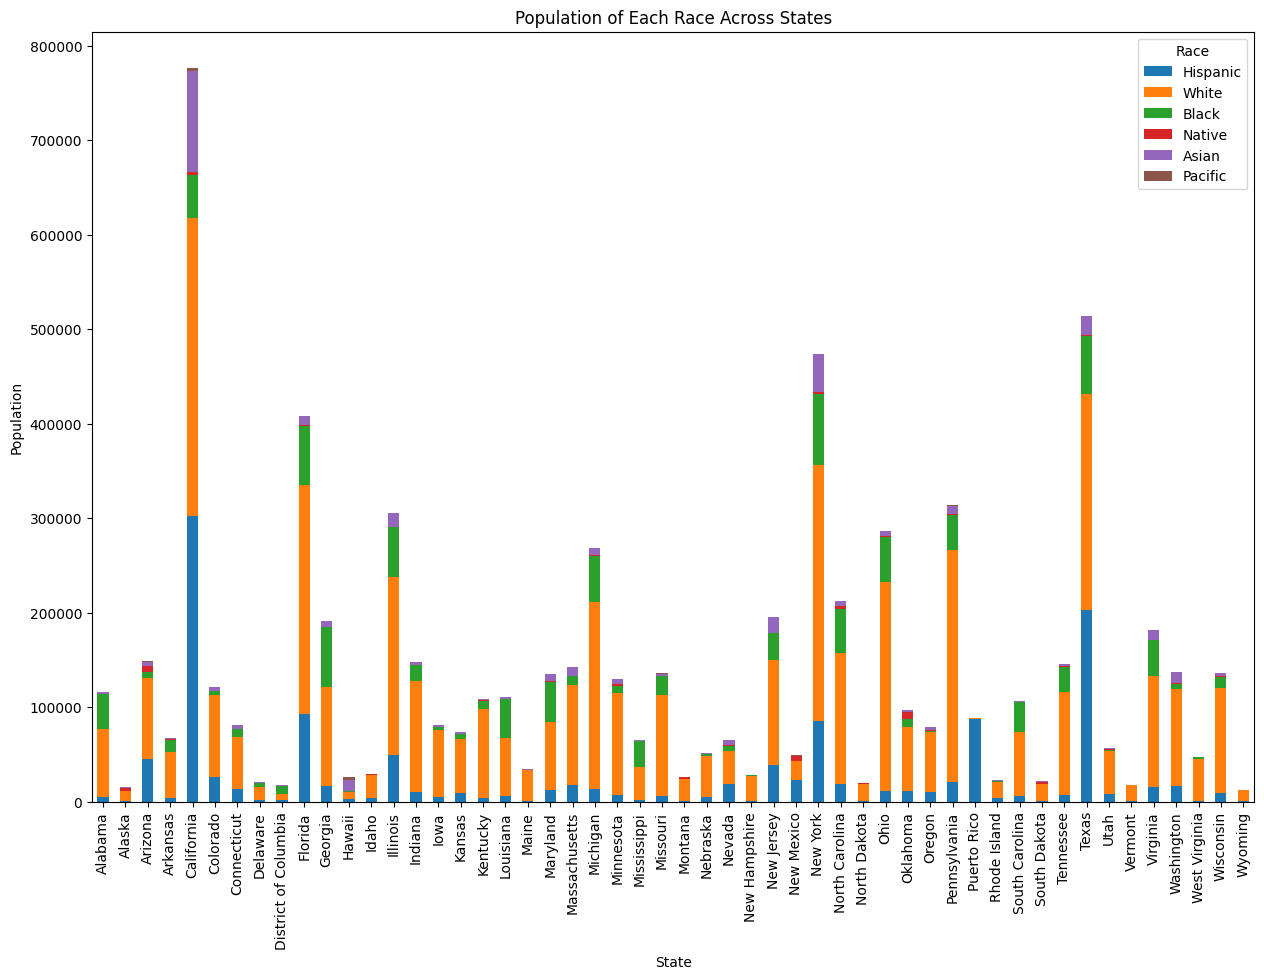

In [69]:
#How does the population of each race (White, Black, Hispanic, etc.) differ across states?

race_population_by_state = df.groupby('State')[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].sum().reset_index()
# print(race_population_by_state)
race_population_by_state

# Plot the population of each race across states
race_population_by_state.set_index('State').plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Population of Each Race Across States')
plt.xlabel('State')
plt.ylabel('Population')
plt.legend(title='Race')
plt.show()


In [70]:
#What is the proportion of the male population compared to the female population in each census tract?

df['MaleToFemaleRatio'] = df['Men'] / df['Women']

# Display the first few rows to verify the calculation
df[['State', 'County', 'TractId', 'Men', 'Women', 'MaleToFemaleRatio']].head()


,State,County,TractId,Men,Women,MaleToFemaleRatio
0,Alabama,Autauga County,1001020100,899,946,0.950317
1,Alabama,Autauga County,1001020200,1167,1005,1.161194
2,Alabama,Autauga County,1001020300,1533,1852,0.827754
3,Alabama,Autauga County,1001020400,2001,2266,0.883054
4,Alabama,Autauga County,1001020500,5054,4911,1.029118


# Ethnicity and Race #

What is the distribution of Hispanic population across various counties and states?

How do different racial groups (White, Black, Native, etc.) vary in terms of percentage of total population in different counties?

Which states have the highest percentage of Black or Hispanic populations? 

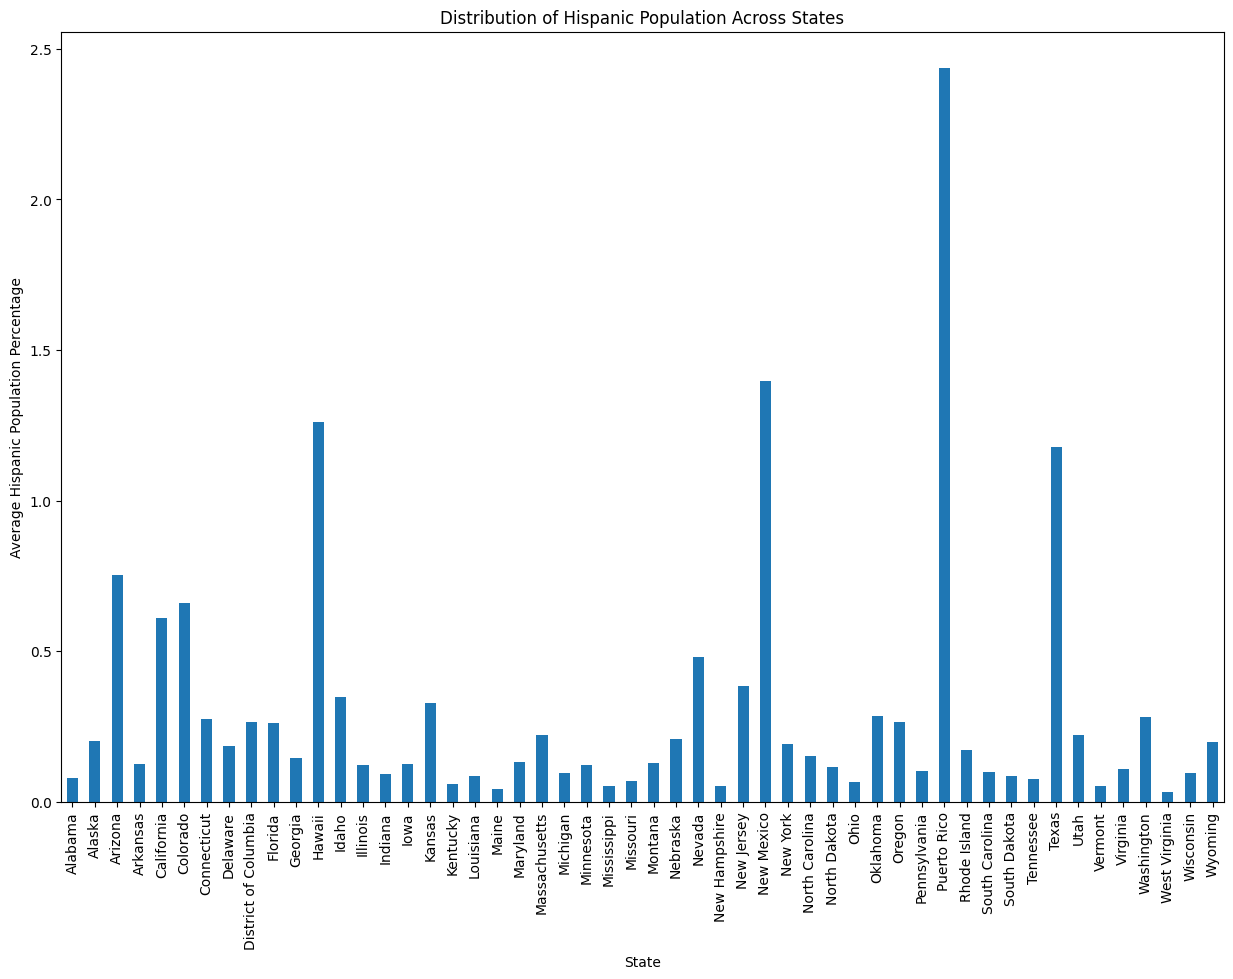

In [71]:
#What is the distribution of Hispanic population across various counties and states?

df['Hispanic_Percentage'] = (df['Hispanic'] / df['TotalPop']) * 100


hispanic_by_county = df.groupby(['State', 'County'])[['Hispanic', 'TotalPop']].sum().reset_index()
hispanic_by_county['Hispanic_Percentage'] = (hispanic_by_county['Hispanic'] / hispanic_by_county['TotalPop']) * 100


hispanic_state_data = hispanic_by_county.groupby('State')['Hispanic_Percentage'].mean()

hispanic_state_data.plot(kind='bar', figsize=(15, 10))
plt.title('Distribution of Hispanic Population Across States')
plt.xlabel('State')
plt.ylabel('Average Hispanic Population Percentage')
plt.show()


In [72]:
#How do different racial groups (White, Black, Native, etc.) vary in terms of percentage of total population in different counties?
# Calculate the percentage of each racial group in each county
df['White_Percentage'] = (df['White'] / df['TotalPop']) * 100
df['Black_Percentage'] = (df['Black'] / df['TotalPop']) * 100
df['Native_Percentage'] = (df['Native'] / df['TotalPop']) * 100
df['Asian_Percentage'] = (df['Asian'] / df['TotalPop']) * 100
df['Pacific_Percentage'] = (df['Pacific'] / df['TotalPop']) * 100

racial_percentage_by_county = df.groupby(['State', 'County'])[['White_Percentage', 'Black_Percentage', 'Native_Percentage', 'Asian_Percentage', 'Pacific_Percentage']].mean().reset_index()

racial_percentage_by_county

,State,County,White_Percentage,Black_Percentage,Native_Percentage,Asian_Percentage,Pacific_Percentage
0,Alabama,Autauga County,2.033985,0.677915,0.011672,0.015104,0.000985
1,Alabama,Baldwin County,1.837739,0.193102,0.017746,0.007720,0.000000
2,Alabama,Barbour County,1.749863,1.845252,0.004166,0.014984,0.000000
3,Alabama,Bibb County,1.787693,0.285017,0.006752,0.000000,0.000000
4,Alabama,Blount County,1.496798,0.018945,0.006233,0.002023,0.000000
...,...,...,...,...,...,...,...
3215,Wyoming,Sweetwater County,2.699432,0.017665,0.018119,0.021793,0.009755
3216,Wyoming,Teton County,1.701364,0.008142,0.005138,0.037086,0.000000
3217,Wyoming,Uinta County,1.283898,0.001929,0.011570,0.001302,0.000000
3218,Wyoming,Washakie County,2.996604,0.008328,0.013837,0.005118,0.000000


States with the highest percentage of Black population:
                   State  Black_Percentage  Hispanic_Percentage
24           Mississippi          1.574405             0.113420
8   District of Columbia          1.548670             0.280445
20              Maryland          1.462464             0.235107
18             Louisiana          1.452869             0.165938
0                Alabama          1.229608             0.114788
32              New York          1.139241             0.865029
22              Michigan          1.118413             0.183960
3               Arkansas          1.020047             0.162479
10               Georgia          0.930425             0.196465
41        South Carolina          0.878945             0.145437
States with the highest percentage of Hispanic population:
          State  Black_Percentage  Hispanic_Percentage
39  Puerto Rico          0.003747             6.660837
4    California          0.249553             1.394659
44        Texas 

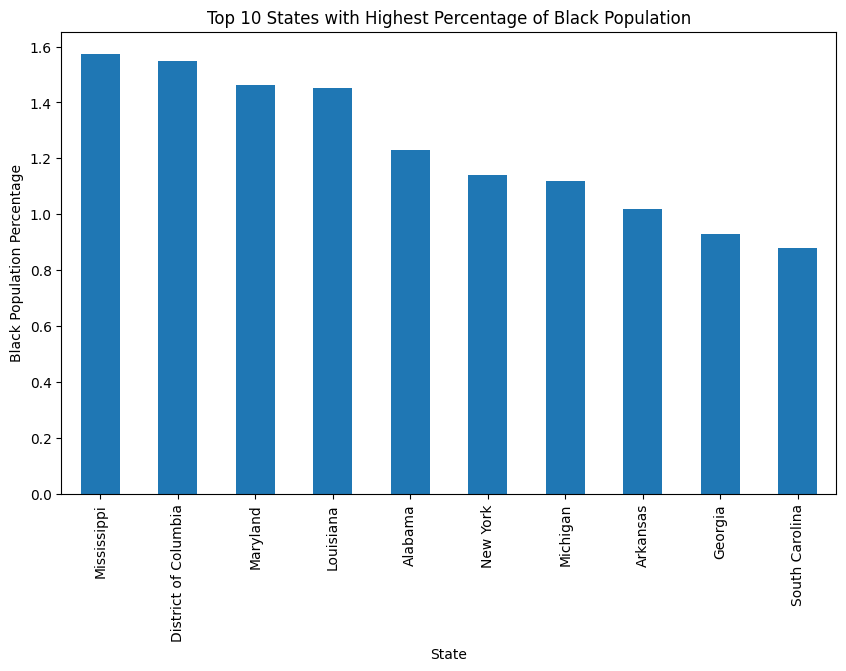

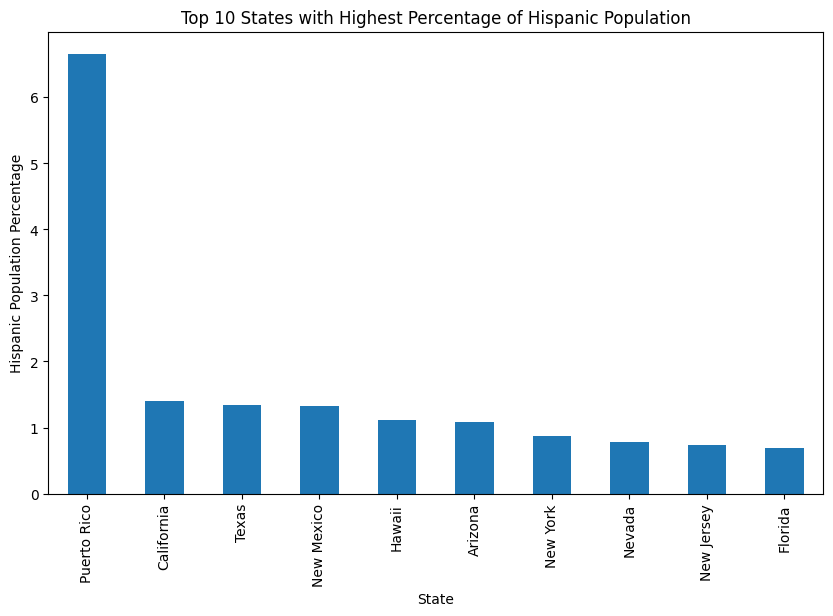

In [73]:
#Which states have the highest percentage of Black or Hispanic populations? 

# Calculate the average percentage of Black and Hispanic populations in each state
black_hispanic_percentage_by_state = df.groupby('State')[['Black_Percentage', 'Hispanic_Percentage']].mean().reset_index()

# the highest percentage of Black population
highest_black_percentage_states = black_hispanic_percentage_by_state.sort_values(by='Black_Percentage', ascending=False).head(10)
print("States with the highest percentage of Black population:")
print(highest_black_percentage_states)

# the highest percentage of Hispanic population
highest_hispanic_percentage_states = black_hispanic_percentage_by_state.sort_values(by='Hispanic_Percentage', ascending=False).head(10)
print("States with the highest percentage of Hispanic population:")
print(highest_hispanic_percentage_states)

# Plot Black population
highest_black_percentage_states.plot(x='State', y='Black_Percentage', kind='bar', figsize=(10, 6), legend=False)
plt.title('Top 10 States with Highest Percentage of Black Population')
plt.xlabel('State')
plt.ylabel('Black Population Percentage')
plt.show()

# Plot Hispanic population
highest_hispanic_percentage_states.plot(x='State', y='Hispanic_Percentage', kind='bar', figsize=(10, 6), legend=False)
plt.title('Top 10 States with Highest Percentage of Hispanic Population')
plt.xlabel('State')
plt.ylabel('Hispanic Population Percentage')
plt.show()

# Employment and Work Type #

What is the employment rate (Employed vs. Unemployed) for each census tract?

How does the rate of self-employed individuals compare to those working in private/public sectors across different states?

What percentage of the population works from home, and how does it vary by county and state?

How does the unemployment rate vary across different states and counties?

What is the distribution of employed individuals working in private vs. public sectors? 

In [74]:
#What is the employment rate (Employed vs. Unemployed) for each census tract?
df['EmploymentRate'] = df['Employed'] / df['TotalPop']
df['UnemploymentRate'] = df['Unemployment'] / df['TotalPop']
df[['State', 'County', 'TractId', 'Employed', 'Unemployment', 'EmploymentRate', 'UnemploymentRate']]




,State,County,TractId,Employed,Unemployment,EmploymentRate,UnemploymentRate
0,Alabama,Autauga County,1001020100,881,4.6,0.477507,0.002493
1,Alabama,Autauga County,1001020200,852,3.4,0.392265,0.001565
2,Alabama,Autauga County,1001020300,1482,4.7,0.437814,0.001388
3,Alabama,Autauga County,1001020400,1849,6.1,0.433326,0.001430
4,Alabama,Autauga County,1001020500,4787,2.3,0.480381,0.000231
...,...,...,...,...,...,...,...
73996,Puerto Rico,Yauco Municipio,72153750501,1576,20.8,0.262186,0.003460
73997,Puerto Rico,Yauco Municipio,72153750502,666,26.3,0.284372,0.011230
73998,Puerto Rico,Yauco Municipio,72153750503,560,23.0,0.252480,0.010370
73999,Puerto Rico,Yauco Municipio,72153750601,1062,29.5,0.242466,0.006735


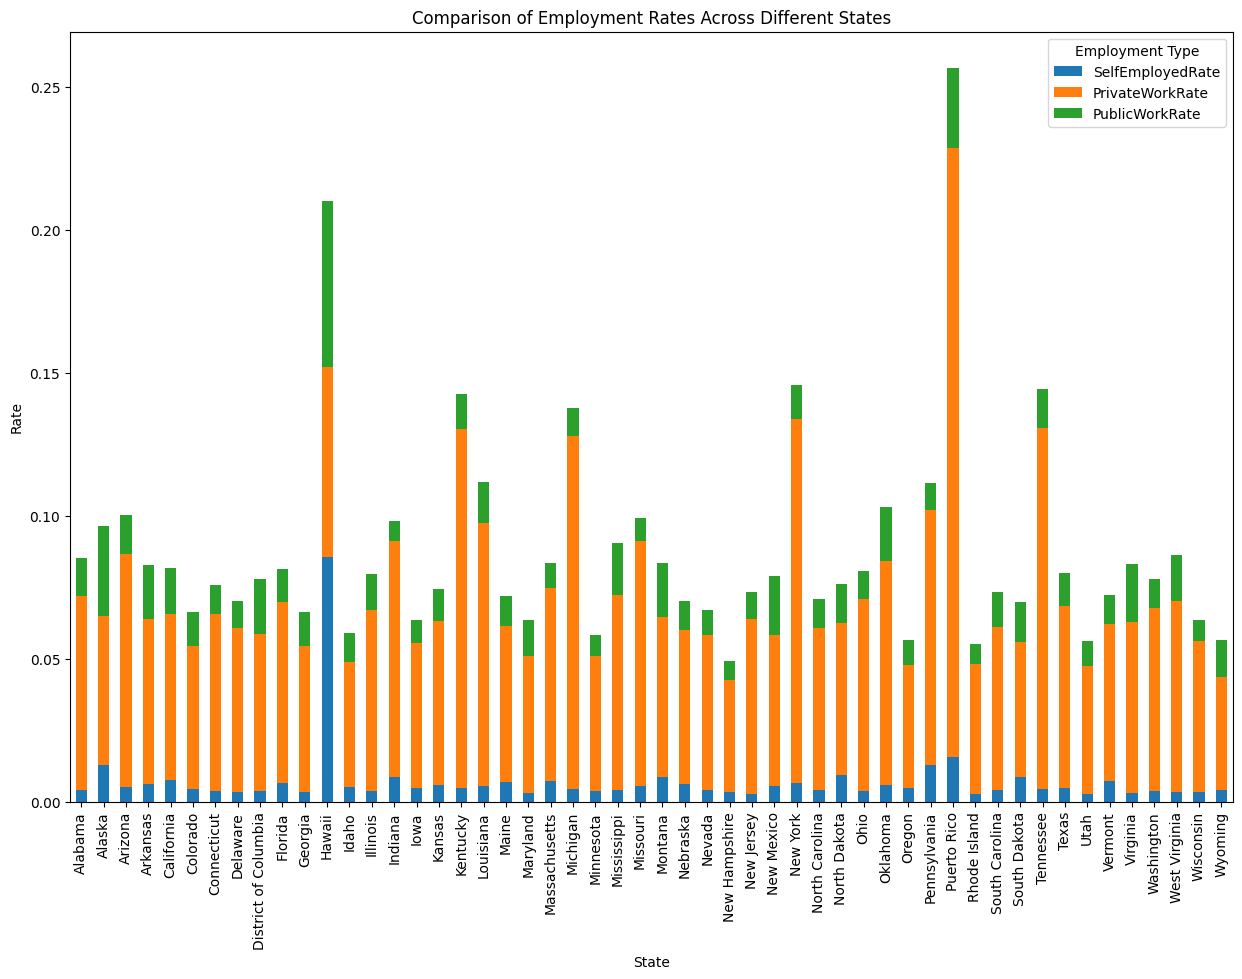

In [75]:
#How does the rate of self-employed individuals compare to those working in private/public sectors across different states?
df['SelfEmployedRate'] = df['SelfEmployed'] / df['Employed']
df['PrivateWorkRate'] = df['PrivateWork'] / df['Employed']
df['PublicWorkRate'] = df['PublicWork'] / df['Employed']


employment_rates_by_state = df.groupby('State')[['SelfEmployedRate', 'PrivateWorkRate', 'PublicWorkRate']].mean().reset_index()

employment_rates_by_state.head()

 
employment_rates_by_state.set_index('State').plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Comparison of Employment Rates Across Different States')
plt.xlabel('State')
plt.ylabel('Rate')
plt.legend(title='Employment Type')
plt.show()


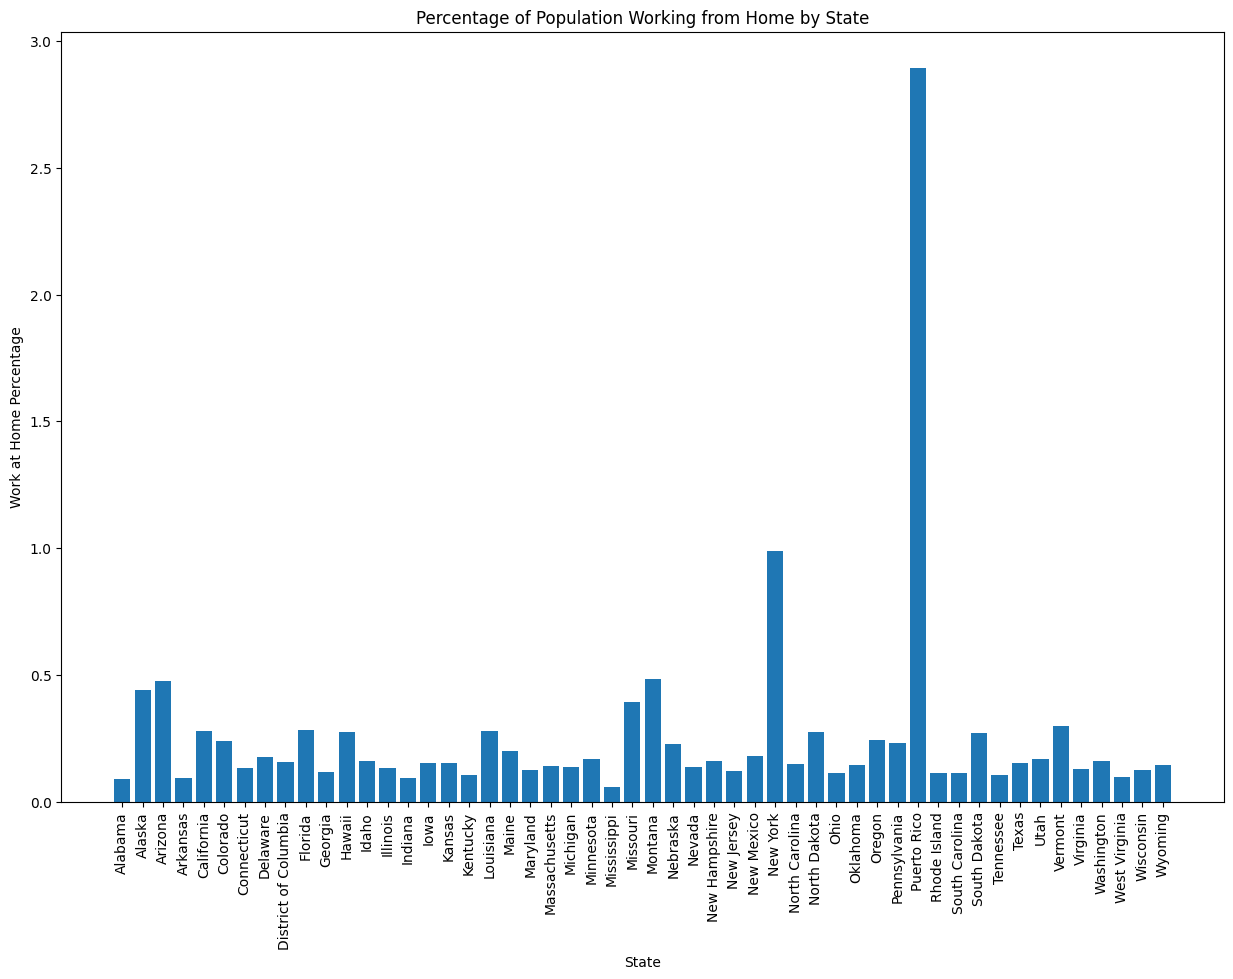

In [76]:
#What percentage of the population works from home, and how does it vary by county and state?

df['WorkAtHomePercentage'] = (df['WorkAtHome'] / df['TotalPop']) * 100


work_at_home_by_county = df.groupby(['State', 'County'])['WorkAtHomePercentage'].mean().reset_index()
work_at_home_by_state = df.groupby('State')['WorkAtHomePercentage'].mean().reset_index()


plt.figure(figsize=(15, 10))
plt.bar(work_at_home_by_state['State'], work_at_home_by_state['WorkAtHomePercentage'])
plt.title('Percentage of Population Working from Home by State')
plt.xlabel('State')
plt.ylabel('Work at Home Percentage')
plt.xticks(rotation=90)
plt.show()

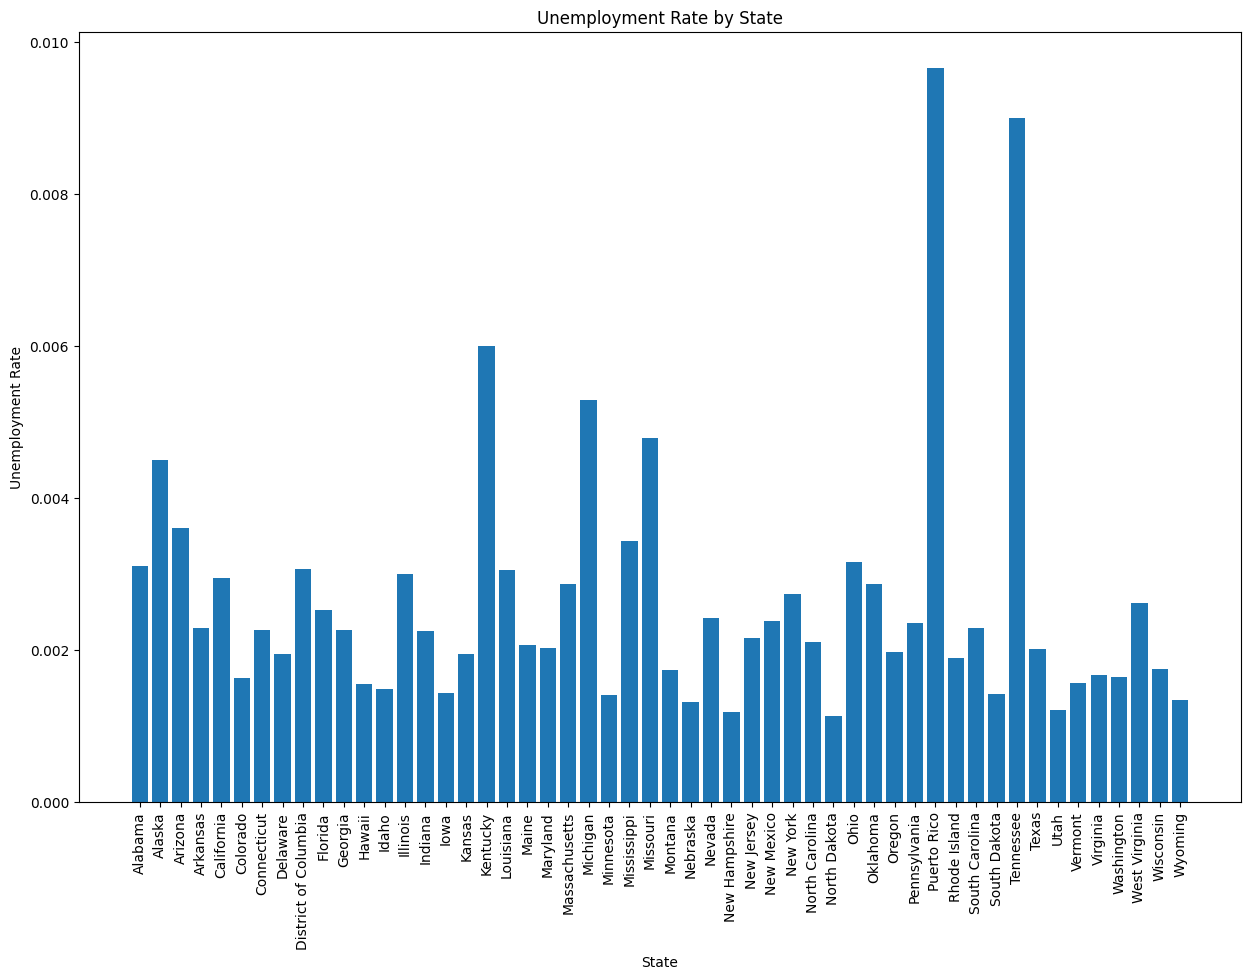

In [77]:
#How does the unemployment rate vary across different states and counties?

unemployment_rate_by_county = df.groupby(['State', 'County'])['UnemploymentRate'].mean().reset_index()
unemployment_rate_by_state = df.groupby('State')['UnemploymentRate'].mean().reset_index()

 
plt.figure(figsize=(15, 10))
plt.bar(unemployment_rate_by_state['State'], unemployment_rate_by_state['UnemploymentRate'])
plt.title('Unemployment Rate by State')
plt.xlabel('State')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=90)
plt.show()


                   State  PrivateWork  PublicWork
0                Alabama      93013.8     18161.0
1                 Alaska      10828.5      4559.1
2                Arizona     119351.9     22220.5
3               Arkansas      52857.1     11189.5
4             California     620398.1    109397.2
5               Colorado      97844.1     17353.8
6            Connecticut      66745.7     10529.6
7               Delaware      17486.0      3008.6
8   District of Columbia      12648.6      4495.2
9                Florida     339459.8     50039.8
10               Georgia     154053.7     30032.9
11                Hawaii      22185.5      6871.9
12                 Idaho      22544.6      4713.8
13              Illinois     257640.6     38630.2
14               Indiana     127561.2     15807.4
15                  Iowa      65720.6     10575.5
16                Kansas      59007.9     11671.1
17              Kentucky      87831.4     16510.3
18             Louisiana      88930.0     17008.1


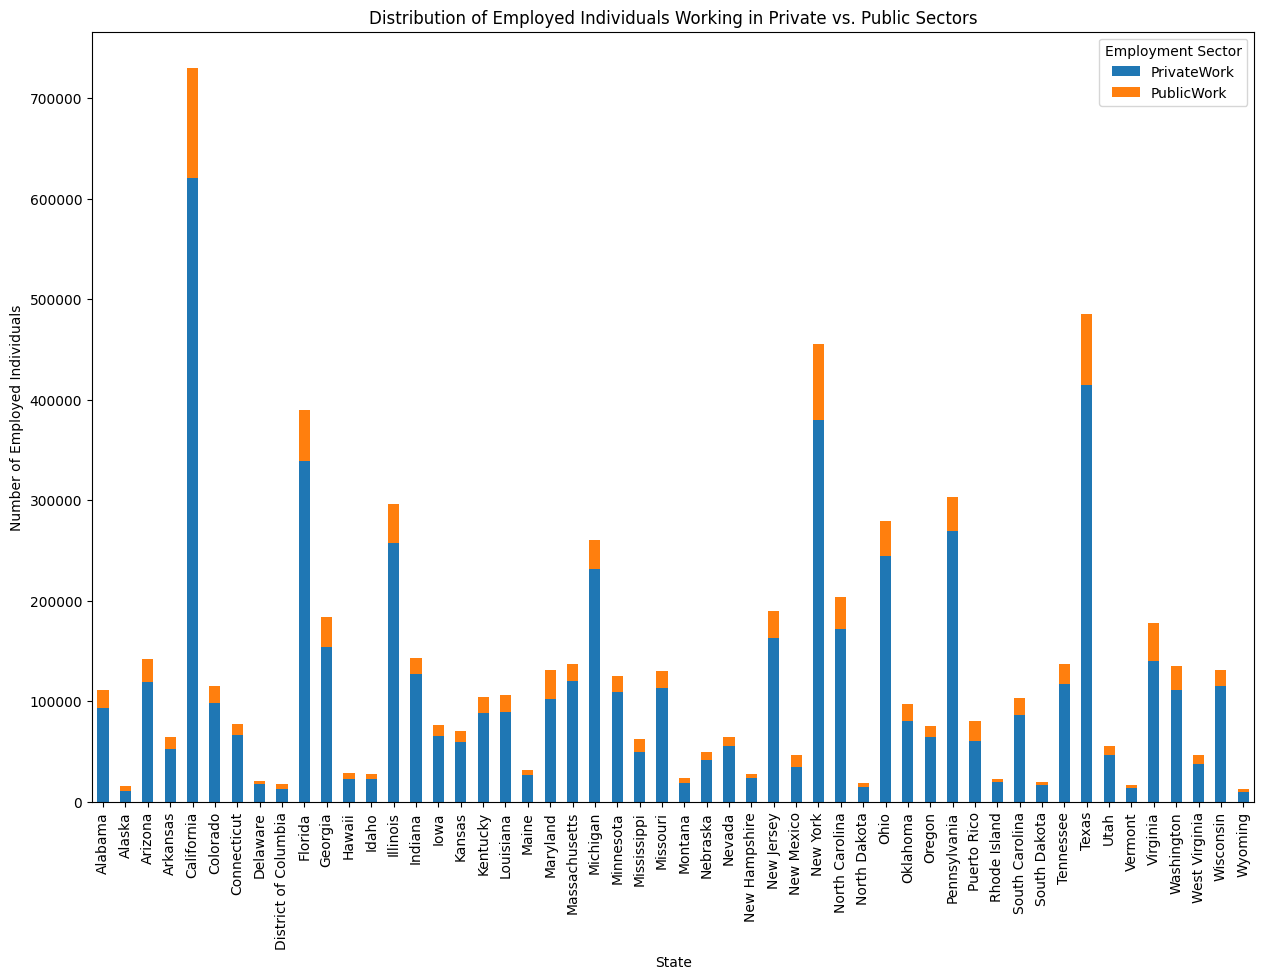

In [78]:
#What is the distribution of employed individuals working in private vs. public sectors? 
employment_distribution_by_sector = df.groupby('State')[['PrivateWork', 'PublicWork']].sum().reset_index()
print(employment_distribution_by_sector)
 
employment_distribution_by_sector.set_index('State').plot(kind='bar', stacked=True, figsize=(15, 10))
plt.title('Distribution of Employed Individuals Working in Private vs. Public Sectors')
plt.xlabel('State')
plt.ylabel('Number of Employed Individuals')
plt.legend(title='Employment Sector')
plt.show()

# Commuting and Transportation #

What is the average commuting time across counties and states, and how does it differ for employed individuals?

What modes of transportation are most commonly used for commuting in different states (e.g., car, public transportation, walking)?

How does the percentage of people commuting via walking or public transportation vary between urban and rural areas?


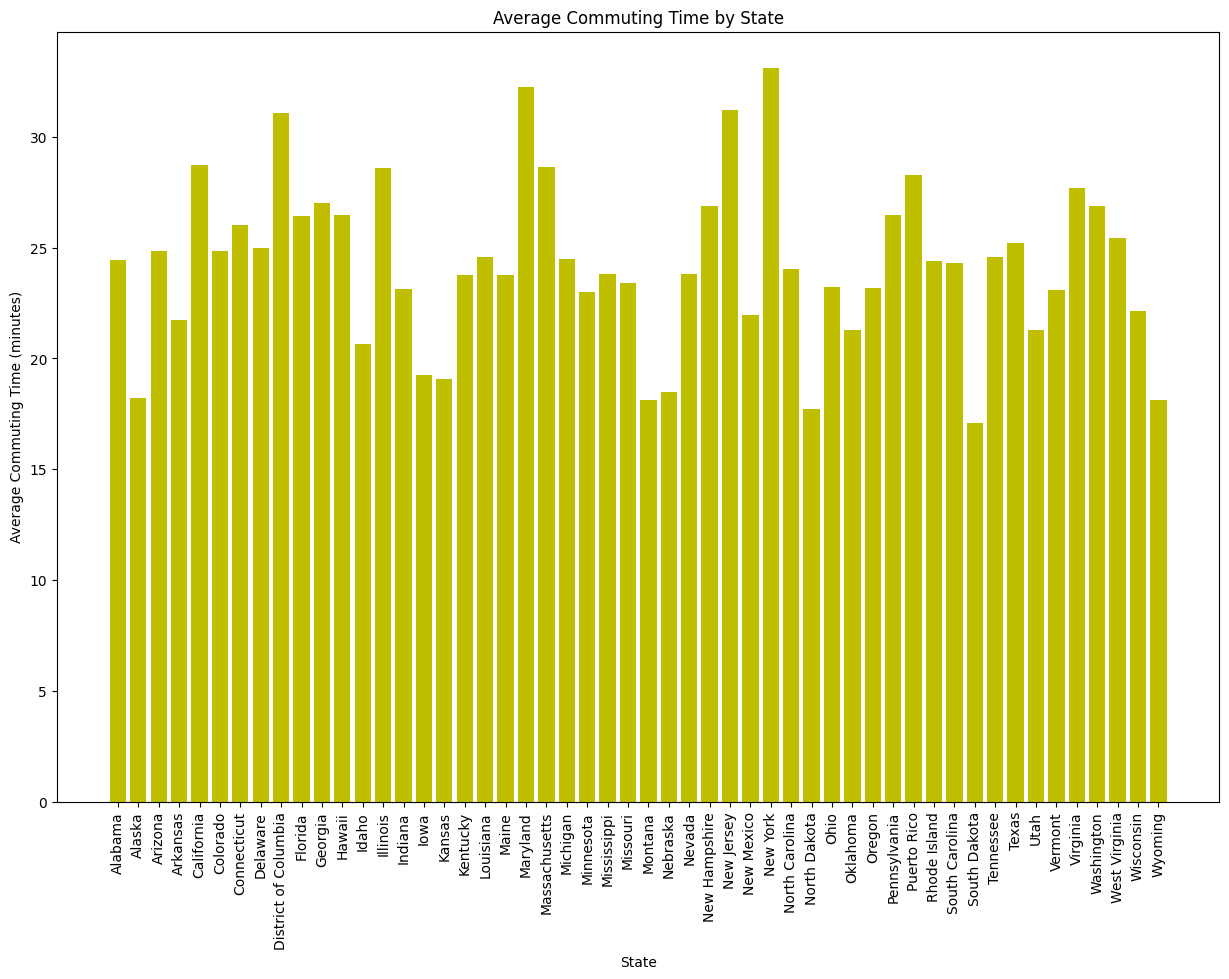

        State             County  MeanCommute
0     Alabama     Autauga County    25.766667
1     Alabama     Baldwin County    27.054839
2     Alabama     Barbour County    22.744444
3     Alabama        Bibb County    31.200000
4     Alabama      Blount County    35.011111
...       ...                ...          ...
3215  Wyoming  Sweetwater County    20.708333
3216  Wyoming       Teton County    14.450000
3217  Wyoming       Uinta County    20.233333
3218  Wyoming    Washakie County    14.533333
3219  Wyoming      Weston County    26.000000

[3220 rows x 3 columns]
                   State  MeanCommute
0                Alabama    24.458638
1                 Alaska    18.209639
2                Arizona    24.833444
3               Arkansas    21.739824
4             California    28.720396
5               Colorado    24.836812
6            Connecticut    26.018909
7               Delaware    24.965421
8   District of Columbia    31.087640
9                Florida    26.436147
10   

In [79]:
#What is the average commuting time across counties and states, and how does it differ for employed individuals?
 
average_commute_by_county = df.groupby(['State', 'County'])['MeanCommute'].mean().reset_index()
average_commute_by_state = df.groupby('State')['MeanCommute'].mean().reset_index()

#see how differ 
plt.figure(figsize=(15, 10))
plt.bar(average_commute_by_state['State'], average_commute_by_state['MeanCommute'],color='y')
plt.title('Average Commuting Time by State')
plt.xlabel('State')
plt.ylabel('Average Commuting Time (minutes)')
plt.xticks(rotation=90)
plt.show()

 
print(average_commute_by_county)
print(average_commute_by_state)

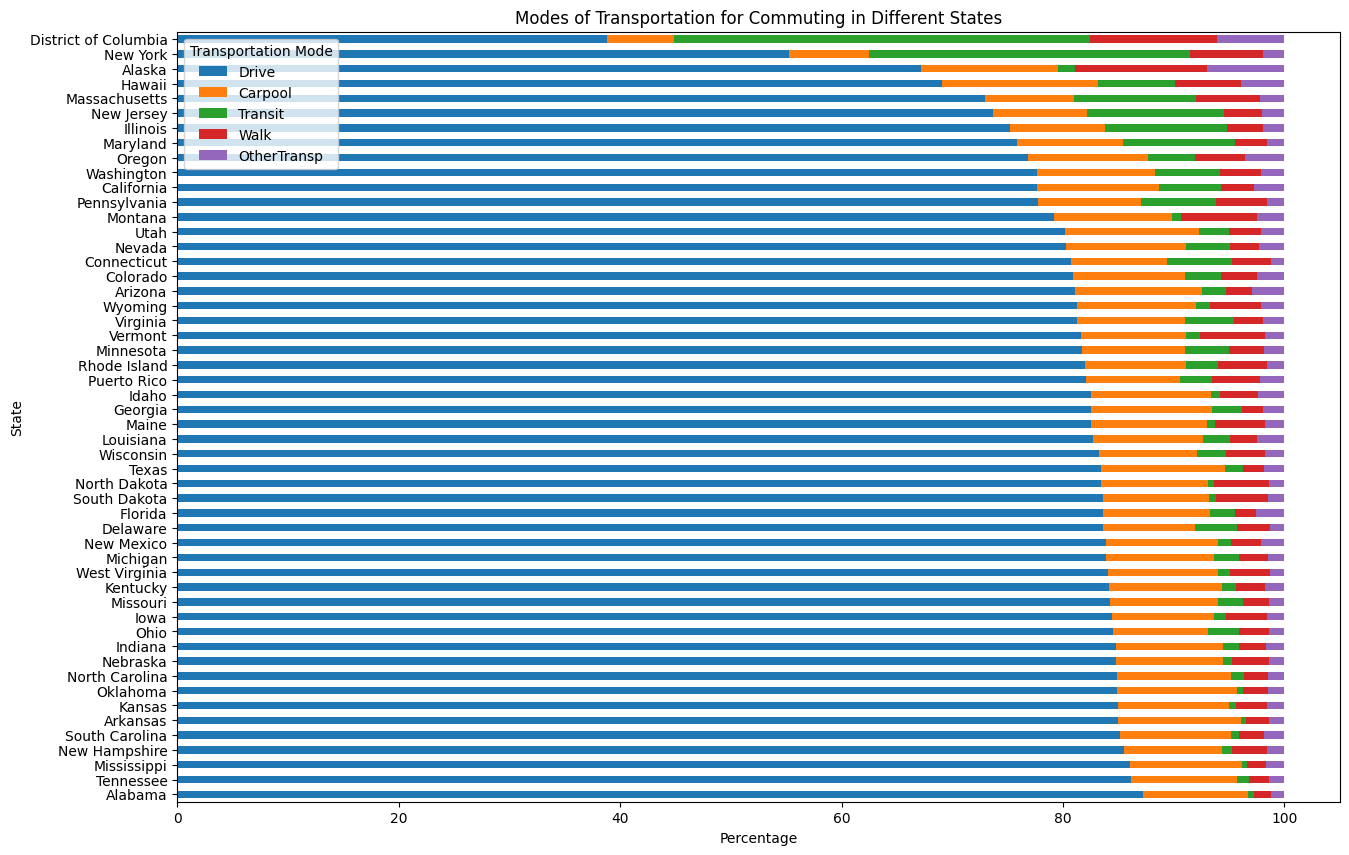

                   State      Drive    Carpool    Transit       Walk  \
0                Alabama  87.237800   9.464023   0.586360   1.483553   
43             Tennessee  86.129360   9.594789   1.083404   1.773425   
24           Mississippi  86.086598  10.119360   0.424133   1.671821   
29         New Hampshire  85.520991   8.814976   0.895838   3.211881   
41        South Carolina  85.126841  10.013474   0.761312   2.265327   
3               Arkansas  85.009745  11.042141   0.500057   2.015314   
16                Kansas  84.992725  10.007144   0.596194   2.837533   
36              Oklahoma  84.907412  10.795471   0.583061   2.210284   
33        North Carolina  84.901295  10.254153   1.212449   2.128705   
27              Nebraska  84.767305   9.650356   0.817301   3.337992   
14               Indiana  84.761873   9.662309   1.482523   2.462258   
35                  Ohio  84.513781   8.589462   2.775086   2.761280   
15                  Iowa  84.454221   9.198036   1.067967   3.69

In [80]:
#What modes of transportation are most commonly used for commuting in different states (e.g., car, public transportation, walking)?

#Calcultions
transportation_modes_by_state = df.groupby('State')[['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']].sum().reset_index()

# Normalize the data to get percentages
transportation_modes_by_state[['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']] = transportation_modes_by_state[['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']].div(transportation_modes_by_state[['Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp']].sum(axis=1), axis=0) * 100

# Sort the data by the 'Drive' column in descending order
transportation_modes_by_state = transportation_modes_by_state.sort_values(by='Drive', ascending=False)

# HoriZontal Plot of the data
transportation_modes_by_state.set_index('State').plot(kind='barh', stacked=True, figsize=(15, 10))
plt.title('Modes of Transportation for Commuting in Different States')
plt.xlabel('Percentage')
plt.ylabel('State')
plt.legend(title='Transportation Mode')
plt.show()

 
print(transportation_modes_by_state)

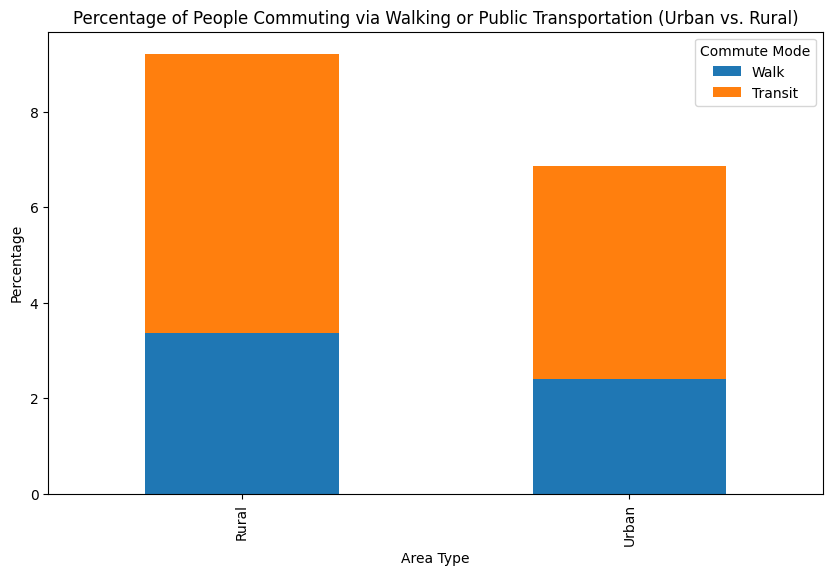

,AreaType,Walk,Transit
0,Rural,3.36198,5.855194
1,Urban,2.39732,4.464799


In [ ]:
#How does the percentage of people commuting via walking or public transportation vary between urban and rural areas?
 
 
df['AreaType'] = np.where(df['TotalPop'] > 5000, 'Urban', 'Rural')

 
commute_modes_by_area = df.groupby('AreaType')[['Walk', 'Transit']].mean().reset_index()

# Plot the data
commute_modes_by_area.set_index('AreaType').plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Percentage of People Commuting via Walking or Public Transportation (Urban vs. Rural)')
plt.xlabel('Area Type')
plt.ylabel('Percentage')
plt.legend(title='Commute Mode')
plt.show()

commute_modes_by_area

# Income and Housing

What is the average income (or median household income) in each state and county?

How does the distribution of housing type (e.g., owner-occupied vs. renter-occupied) vary across different counties?

How does the cost of living compare across different states based on average income and housing costs?

In [81]:
#What is the average income (or median household income) in each state and county?
average_income_by_county = df.groupby(['State', 'County'])['Income'].mean().reset_index()
average_income_by_state = df.groupby('State')['Income'].mean().reset_index()

print(average_income_by_county.head())
print(average_income_by_state.head())

     State          County        Income
0  Alabama  Autauga County  53567.500000
1  Alabama  Baldwin County  52732.225806
2  Alabama  Barbour County  32717.777778
3  Alabama     Bibb County  44677.000000
4  Alabama   Blount County  46325.555556
        State        Income
0     Alabama  45938.212947
1      Alaska  73796.757576
2     Arizona  57815.571807
3    Arkansas  44245.267936
4  California  73070.965821


In [82]:
# Calculate the total number of owner-occupied and renter-occupied housing units in each county
# housing_distribution_by_county = df.groupby(['State', 'County'])[['OwnerOccupied', 'RenterOccupied']].sum().reset_index()

# # Plot the distribution
# fig, ax = plt.subplots(figsize=(15, 10))
# housing_distribution_by_county.set_index(['State', 'County']).plot(kind='bar', stacked=True, ax=ax)
# ax.set_title('Distribution of Housing Type (Owner-Occupied vs. Renter-Occupied) Across Different Counties')
# ax.set_xlabel('County')
# ax.set_ylabel('Number of Housing Units')
# plt.legend(title='Housing Type')
# plt.show()

#Missing Column OwnerOccupied and RenterOccupied

print(df.columns) 

Index(['TractId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen',
       'Income', 'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment', 'MaleToFemaleRatio',
       'Hispanic_Percentage', 'White_Percentage', 'Black_Percentage',
       'Native_Percentage', 'Asian_Percentage', 'Pacific_Percentage',
       'EmploymentRate', 'UnemploymentRate', 'SelfEmployedRate',
       'PrivateWorkRate', 'PublicWorkRate', 'WorkAtHomePercentage'],
      dtype='object')


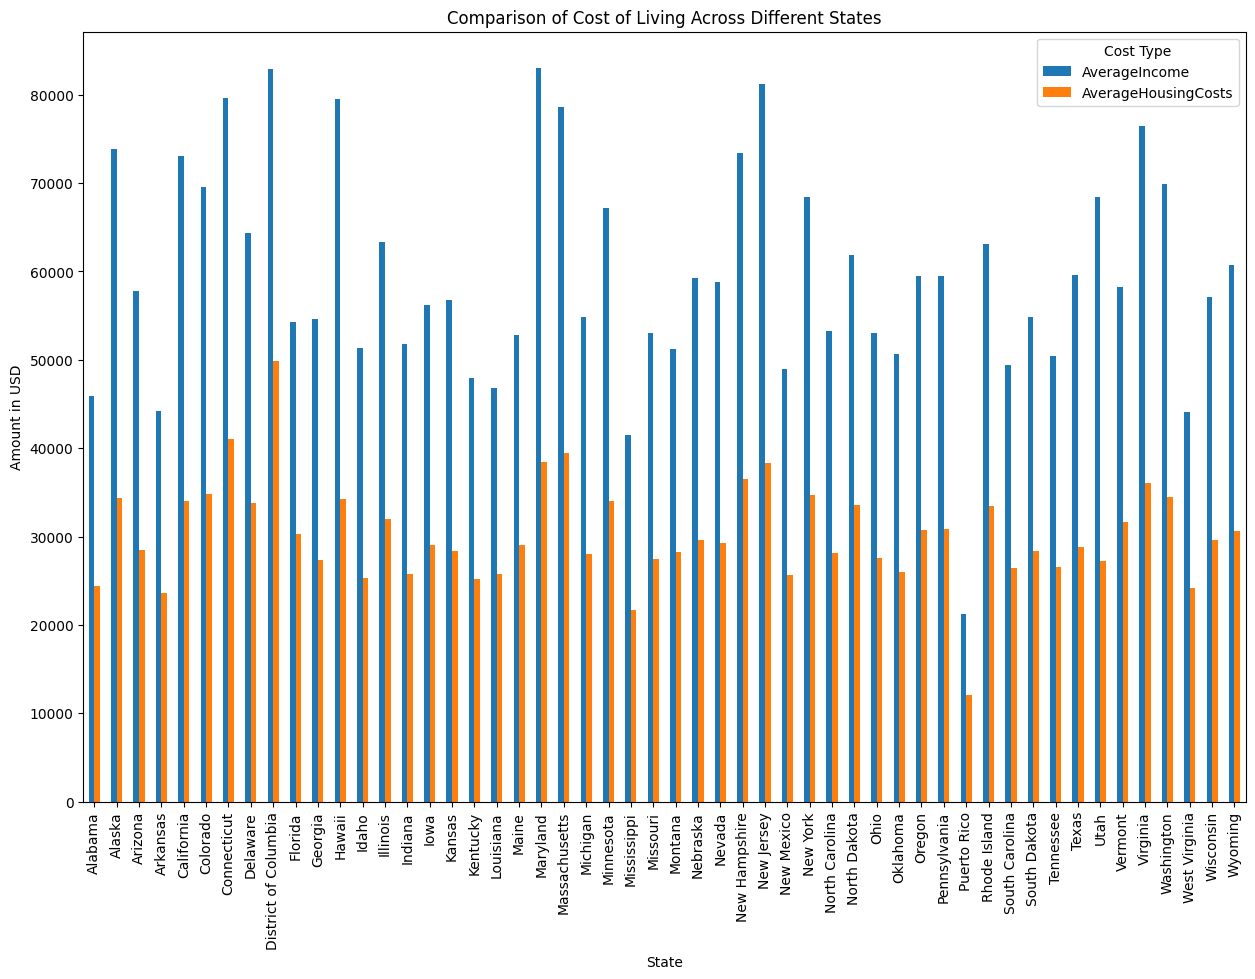

In [83]:
#How does the cost of living compare across different states based on average income and housing costs?
 
average_income_by_state = df.groupby('State')['Income'].mean().reset_index()
average_housing_costs_by_state = df.groupby('State')['IncomePerCap'].mean().reset_index()

cost_of_living_by_state = pd.merge(average_income_by_state, average_housing_costs_by_state, on='State')
cost_of_living_by_state.columns = ['State', 'AverageIncome', 'AverageHousingCosts']

# Plot the comparison of cost of living across different states
cost_of_living_by_state.set_index('State').plot(kind='bar', figsize=(15, 10))
plt.title('Comparison of Cost of Living Across Different States')
plt.xlabel('State')
plt.ylabel('Amount in USD')
plt.legend(title='Cost Type')
plt.show()


# Social Characteristics

What is the relationship between education levels (e.g., percentage with a high school diploma, bachelor’s degree) and employment types across different states?

In [84]:
#What is the relationship between education levels and employment types across different states?

#Missing column HighSchoolGrad, Bachelors, and Graduate 


 
# Conclusion

The analysis of the dataset provides valuable insights into various demographic, social, and economic characteristics across different states and counties in the United States. Here are the key conclusions drawn from the tasks performed:

1. **General Population and Gender Distribution**:
    - The total population varies significantly across states and counties, with California having the highest population.
    - Gender distribution shows a relatively balanced ratio of men to women across most counties, with some variations.

2. **Ethnicity and Race**:
    - The Hispanic population is predominantly concentrated in states like California, Texas, and New Mexico.
    - States like Mississippi and the District of Columbia have the highest percentages of Black populations.
    - The racial composition varies widely, with some states having higher percentages of specific racial groups.

3. **Employment and Work Type**:
    - Employment rates and types of employment (private, public, self-employed) vary across states.
    - States like Puerto Rico have higher self-employment rates, while others like Hawaii have significant public sector employment.
    - The percentage of people working from home is higher in states like Puerto Rico and Montana.

4. **Commuting and Transportation**:
    - Average commuting times differ across states, with some states having longer average commutes.
    - Driving is the most common mode of transportation, but states like New York and the District of Columbia have higher percentages of public transit users.

5. **Income and Housing**:
    - Average income levels vary across states, with states like California and New York having higher average incomes.
    - The cost of living, based on average income and housing costs, also varies, impacting the overall economic well-being of residents.

6. **Social Characteristics**:
    - The relationship between education levels and employment types indicates that higher education levels are associated with higher employment rates in professional sectors.

Overall, the dataset provides a comprehensive view of the demographic, social, and economic landscape of the United States, highlighting the diversity and disparities across different regions. This analysis can be useful for policymakers, researchers, and organizations aiming to address social and economic issues at the state and county levels.